In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

This notebook explores the WLASL dataset, which stands for Word-Level-American-Sign-Language detection dataset. According to website description, the dataset consists of 2000 ASL words. For each word, there're multiple videos signed by different people representing the word

In [17]:
with open('WLASL_v0.3.json') as f:
    data = json.load(f)

Each index position of `data` represents 1 gloss/word

In [13]:
print(f'data len: {len(data)}, item keys: {data[0].keys()}')

data len: 2000, item keys: dict_keys(['gloss', 'instances'])


The `gloss` keyword gives the word. Each instance in `instances` is a specific video

In [19]:
word = data[0]['gloss']
length = len(data[0]['instances'])
print(f'the first word is {word} and has {length} videos')

the first word is book and has 40 videos


In [20]:
minLen = 1e9
minWord = None
for word_data in data:
    if len(word_data['instances']) < minLen:
        minLen = len(word_data['instances'])
        minWord = word_data['gloss']
print(f'{minWord} has least videos, only {minLen} videos')

caterpillar has least videos, only 6 videos


In [23]:
words = [word_data['gloss'] for word_data in data]
print('the first 100 words are:')
print(words[:100])

the first 100 words are:
['book', 'drink', 'computer', 'before', 'chair', 'go', 'clothes', 'who', 'candy', 'cousin', 'deaf', 'fine', 'help', 'no', 'thin', 'walk', 'year', 'yes', 'all', 'black', 'cool', 'finish', 'hot', 'like', 'many', 'mother', 'now', 'orange', 'table', 'thanksgiving', 'what', 'woman', 'bed', 'blue', 'bowling', 'can', 'dog', 'family', 'fish', 'graduate', 'hat', 'hearing', 'kiss', 'language', 'later', 'man', 'shirt', 'study', 'tall', 'white', 'wrong', 'accident', 'apple', 'bird', 'change', 'color', 'corn', 'cow', 'dance', 'dark', 'doctor', 'eat', 'enjoy', 'forget', 'give', 'last', 'meet', 'pink', 'pizza', 'play', 'school', 'secretary', 'short', 'time', 'want', 'work', 'africa', 'basketball', 'birthday', 'brown', 'but', 'cheat', 'city', 'cook', 'decide', 'full', 'how', 'jacket', 'letter', 'medicine', 'need', 'paint', 'paper', 'pull', 'purple', 'right', 'same', 'son', 'tell', 'thursday']


To further analyze these, words, we import "google-10000-english-us" file which contains the top 10000 most frequent English words (kudos to [this guy](https://github.com/first20hours/google-10000-english))

In [28]:
with open('google-10000-english-usa.txt') as f:
    freq_words = f.read().splitlines()
print('top 100 most frequent words: ')
print(freq_words[:100])

top 100 most frequent words: 
['the', 'of', 'and', 'to', 'a', 'in', 'for', 'is', 'on', 'that', 'by', 'this', 'with', 'i', 'you', 'it', 'not', 'or', 'be', 'are', 'from', 'at', 'as', 'your', 'all', 'have', 'new', 'more', 'an', 'was', 'we', 'will', 'home', 'can', 'us', 'about', 'if', 'page', 'my', 'has', 'search', 'free', 'but', 'our', 'one', 'other', 'do', 'no', 'information', 'time', 'they', 'site', 'he', 'up', 'may', 'what', 'which', 'their', 'news', 'out', 'use', 'any', 'there', 'see', 'only', 'so', 'his', 'when', 'contact', 'here', 'business', 'who', 'web', 'also', 'now', 'help', 'get', 'pm', 'view', 'online', 'c', 'e', 'first', 'am', 'been', 'would', 'how', 'were', 'me', 's', 'services', 'some', 'these', 'click', 'its', 'like', 'service', 'x', 'than', 'find']


Now we analyze the utility of the dataset by looking at how many of the top 2000 most frequent words appear in the dataset

In [32]:
count = 0
for word in freq_words[:2000]:
    if word in words:
        count+=1
print(f'out of the top 2000 most frequent words, {count} is in data')

out of the top 2000 most frequent words, 820 is in data


In [34]:
count = 0
for word in freq_words[:1000]:
    if word in words:
        count+=1
print(f'out of the top 1000 most frequent words, {count} is in data')

out of the top 1000 most frequent words, 523 is in data


In [39]:
count = 0
for word in freq_words[:200]:
    if word in words:
        count+=1
print(f'out of the top 200 most frequent words, {count} is in data')

out of the top 200 most frequent words, 135 is in data


In [30]:
count = 0
for word in freq_words:
    if word in words:
        count+=1
print(f'out of the top 10000 most frequent words, {count} is in data')

out of the top 10000 most frequent words, 1629 is in data


Overall there's good overlap between the frequent words and ASL dataset words. Because it's ASL, some English words inherently are not in the ASL, so it's unsurprising that the overlap is imperfect

Now another important metric of the dataset is the number of samples/videos for each word (particularly the frequent words), so we plot a histogram of word vs #samples

In [52]:
sample_count = []
for word in freq_words[:50]:
    if word not in words:
        sample_count.append(0)
        continue
    sample_count.append(len(data[words.index(word)]['instances']))
print(f'sample counts are {sample_count}')

sample counts are [0, 0, 11, 11, 8, 11, 12, 0, 9, 12, 0, 8, 17, 7, 16, 0, 14, 7, 0, 0, 13, 0, 0, 15, 21, 17, 15, 15, 0, 0, 10, 12, 16, 20, 0, 15, 10, 10, 12, 0, 9, 8, 18, 7, 12, 11, 0, 22, 10, 19]


<BarContainer object of 50 artists>

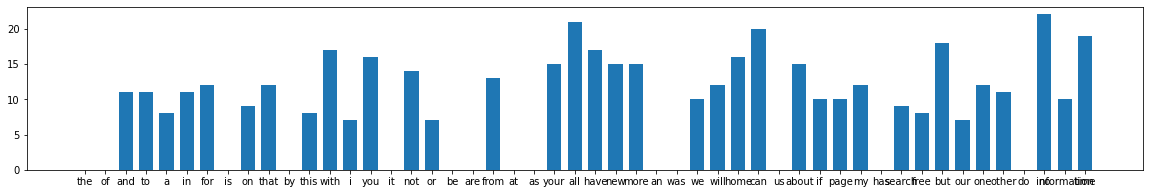

In [55]:
plt.figure(figsize=(20, 3))
plt.bar(freq_words[:50], height=sample_count, align='center', width=0.7)

Unfortunately, there's no correlation of frequency of words with the number of videos/samples they have

Finally let's look into what a single instance contains

In [58]:
instance = data[0]['instances'][0]
print(instance)

{'bbox': [385, 37, 885, 720], 'fps': 25, 'frame_end': -1, 'frame_start': 1, 'instance_id': 0, 'signer_id': 118, 'source': 'aslbrick', 'split': 'train', 'url': 'http://aslbricks.org/New/ASL-Videos/book.mp4', 'variation_id': 0, 'video_id': '69241'}


According to description, bbox is in the format of $(x_\text{min}, y_\text{min}, x_\text{max}, y_\text{max})$. frame_start, frame_end indicates where in the video the gloss begins (-1 means the last frame, 1 means the first frame). The video should be read in and decoded with the specified fps 